In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import jax.numpy as jnp
import jax
from scipy.special import erfcinv
from functools import partial, wraps

In [2]:
import lib

In [1]:
ns=300
nd=200
rho=1
bias = 2.75
ndR = 4
kappa = 2.25
n_votes = nd
vote_th = bias
la = bias - np.sqrt(2)*erfcinv(2*ndR/nd)
beta = 10.0242

# ns=300
# nd=200
# bias = 2.32635
# ndR = 3
# n_votes = nd
# kappa = 3.
# la = 0.445556
# # # beta = 11.5

decay_steps = 30000
n_tested_patterns = 1000
initial_steps = 5000

seed = 1011
rng = np.random.default_rng(seed)

neuron = lib.Neuron10_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, beta=beta, vote_th=vote_th, seed=rng.integers(100000))
# neuron = lib.Neuron3_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, n_votes=n_votes, vote_th=vote_th, seed=rng.integers(100000))
# neuron = lib.Neuron4_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, la=la, n_votes=n_votes, vote_th=vote_th, seed=rng.integers(100000))

# xs_gen = lib.Xs_Generator1(1, ns, normalized_len=np.sqrt(ns), seed=rng.integers(100000))
xs_gen = lib.Xs_Generator3_2(1, ns, rho, normalized_len=np.sqrt(ns), seed=rng.integers(100000))

# simulation_run = lib.Simulation_Run(neuron, xs_gen, decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, refresh_every=500, seed=rng.integers(100000))
simulation_run = lib.Simulation_Run(neuron, xs_gen, decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, refresh_every=500, seed=rng.integers(100000))

NameError: name 'np' is not defined

In [4]:
simulation_run.run()

100%|██████████| 31000/31000 [00:56<00:00, 552.42it/s]


In [5]:
upper99_1 = jnp.mean(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), decay_steps-10000:decay_steps])
mean_1_init = jnp.mean(simulation_run.votes_record, axis=0)[0]
print(upper99_1)
print(mean_1_init)

0.8185172
8.936122


In [6]:
theory_mean = np.genfromtxt("tmp_data/meanTimeList.csv", delimiter=',')
theory_lower99 = np.genfromtxt("tmp_data/lower99TimeList.csv", delimiter=',')
theory_upper99 = np.genfromtxt("tmp_data/upper99TimeList.csv", delimiter=',')

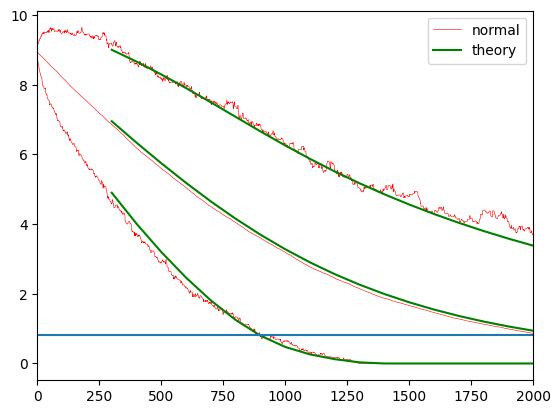

In [7]:
plt.plot(np.mean(simulation_run.votes_record, axis=0)[:decay_steps], c="red", linewidth=0.4, label="normal")
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="red", linewidth=0.4)
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="red", linewidth=0.4)

plt.plot(theory_mean[:, 0], theory_mean[:, 1], c="green", label="theory")
plt.plot(theory_lower99[:, 0], theory_lower99[:, 1], c="green")
plt.plot(theory_upper99[:, 0], theory_upper99[:, 1], c="green")

plt.hlines(upper99_1, 0, decay_steps)
plt.xlim(00, 2000)
# plt.ylim(1, 1.5)
plt.legend()
# plt.yscale("log")